# einops

使用`pip install einops`安装

https://zhuanlan.zhihu.com/p/342675997

In [4]:

import numpy as np
# einops主要是rearrange, reduce, repeat这3个方法
from einops import rearrange, repeat, reduce
# 处理图片
from PIL import Image

## numpy导入数据复习

In [3]:
# 默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中
a = np.arange(10)
# 如果文件路径末尾没有扩展名.npy，则该扩展名会被自动加上
np.save("a_array", a)

In [4]:
# 导入图片
b = np.load("a_array.npy")
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# 通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可
a = np.arange(5)
b = np.arange(11, 20, 2)
np.savez("array_archive.npz", arr_a=a, arr_b=b)


In [7]:
# 加载.npz文件时，会得到一个类似字典的对象，该对象会对各个数组进行延迟加载
arch = np.load("array_archive.npz")
arch["arr_a"]

array([0, 1, 2, 3, 4])

In [8]:
# 如果要将数据压缩，可以使用numpy.savez_compressed
a = np.arange(5)
b = np.arange(11, 20, 2)
np.savez_compressed("arrays_compressed.npz",arr_a=a, arr_b=b)

In [9]:
arch = np.load("arrays_compressed.npz")
arch["arr_b"]

array([11, 13, 15, 17, 19])

### numpy导入图片

https://blog.csdn.net/qq_18351157/article/details/103730014

In [12]:
from PIL import Image

In [15]:
img1 = np.array(Image.open("tempdata/test_imags/e.png"))
img1

array([[[255, 230, 230],
        [255, 230, 230],
        [255, 230, 230],
        ...,
        [255, 230, 230],
        [255, 230, 230],
        [255, 230, 230]],

       [[255, 230, 230],
        [255, 230, 230],
        [255, 230, 230],
        ...,
        [255, 230, 230],
        [255, 230, 230],
        [255, 230, 230]],

       [[255, 230, 230],
        [255, 230, 230],
        [255, 230, 230],
        ...,
        [255, 230, 230],
        [255, 230, 230],
        [255, 230, 230]],

       ...,

       [[255, 230, 230],
        [255, 230, 230],
        [255, 230, 230],
        ...,
        [255, 230, 230],
        [255, 230, 230],
        [255, 230, 230]],

       [[255, 230, 230],
        [255, 230, 230],
        [255, 230, 230],
        ...,
        [255, 230, 230],
        [255, 230, 230],
        [255, 230, 230]],

       [[255, 230, 230],
        [255, 230, 230],
        [255, 230, 230],
        ...,
        [255, 230, 230],
        [255, 230, 230],
        [255, 230, 230]]

In [17]:
img1.dtype, img1.shape, type(img1)

(dtype('uint8'), (233, 206, 3), numpy.ndarray)

In [19]:
# 指定导入类型
img2 = np.array(Image.open("tempdata/test_imags/e.png"), dtype=np.float)
img2.dtype, img2.shape, type(img2)

(dtype('float64'), (233, 206, 3), numpy.ndarray)

In [23]:
import os
images_list = os.listdir("tempdata/test_imags/")
images_list

['i.png', 'e.png', 'fangao.jpg', '复旦.jpg', 'p.png', 'o.png', 'n.png', 's.png']

In [24]:
"tempdata/test_imags/" + images_list[0]  # 路径拼接

'tempdata/test_imags/i.png'

In [35]:
# 将tempdata/test_imags的文件全部导入
cur_path = "tempdata/test_imags/"
images = []
for img_path in images_list:
    img = Image.open(cur_path+img_path)
    # 图片尺寸不一致，统一大小前需要裁剪成同一尺寸
    img = img.resize((90,90), Image.ANTIALIAS)
    img_array = np.array(img, dtype=np.float)
    images.append(img_array)


In [37]:
images[1].shape,images[2].shape,

((90, 90, 3), (90, 90, 3))

### numpy合并成batch的思路

In [33]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])  # （2，3）
arr2 = np.array([[7, 8, 9], [10, 11, 12]]) # （2，3）
arr = [arr1[np.newaxis,:], arr2[np.newaxis,:]]
arr = np.concatenate(arr, axis=0)
arr.shape

(2, 2, 3)

In [39]:
# 将上述导入图片合并成一个batch

images = [img[np.newaxis,:] for img in images]
images = np.concatenate(images, axis=0)
images.shape

(8, 90, 90, 3)

### numpy保存图片数组

In [53]:
np.save("test_images.npy", images)

NameError: name 'images' is not defined

In [42]:
# 导入验证
im = np.load("test_images.npy", allow_pickle=False)
im.shape

(8, 90, 90, 3)

## rearrange：重新安排维度

In [55]:
# 首先导入一组图片
ims = np.load("./test_images.npy", allow_pickle=False)
ims.shape, ims.dtype

((8, 90, 90, 3), dtype('float64'))

### 轴合并

In [23]:
ims_1 = ims[0]
ims_1

array([[[247., 255., 247.],
        [247., 255., 247.],
        [247., 255., 247.],
        ...,
        [247., 255., 247.],
        [247., 255., 247.],
        [247., 255., 247.]],

       [[230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.],
        ...,
        [230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.]],

       [[230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.],
        ...,
        [230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.]],

       ...,

       [[230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.],
        ...,
        [230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.]],

       [[230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.],
        ...,
        [230., 255., 230.],
        [230., 255., 230.],
        [230., 255., 230.]],

       [[230., 255., 230.],
        [230., 255., 230.],
        [230., 2

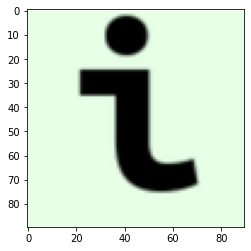

In [24]:
import matplotlib.pyplot as plt
plt.imshow(ims_1.astype(np.uint))
plt.show()

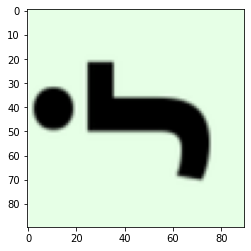

In [25]:
# 转换张量的维度--之前的做法是使用transpose()
ims_1_1 = ims_1.transpose(1,0,2)
plt.imshow(ims_1_1.astype(np.uint))
plt.show()

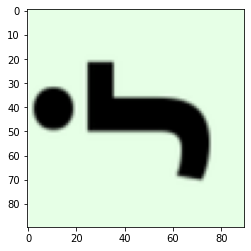

In [26]:
# 新方法
ims_1_2 = rearrange(ims_1, 'h w c -> w h c')
plt.imshow(ims_1_2.astype(np.uint))

合并前两个维度--合并h（所有图片竖向成一个图）

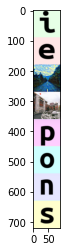

In [27]:
# 合并前两个维度--之前的方法
ims_o = ims.reshape((-1,ims.shape[2], ims.shape[3]))  
plt.imshow(ims_o.astype(np.uint))

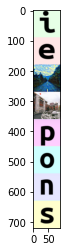

In [29]:
# 合并前两个维度--新方法
ims_n = rearrange(ims, "b h w c -> (b h) w c")
plt.imshow(ims_n.astype(np.uint))

合并w(所有图片横向成一个图)

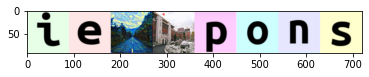

In [33]:
# 将前两个维度交换再合并中间两个维度--合并w(所有图片横向成一个图)

# 将前两个维度交换
ims_q = ims.transpose(1,0,2,3)
# 合并中间两个维度
ims_q = ims_q.reshape(ims_q.shape[0], -1, ims_q.shape[3])
plt.imshow(ims_q.astype(np.uint))

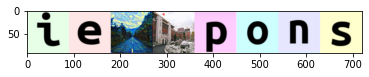

In [34]:
# 新方法
ims_q2 = rearrange(ims, "b h w c -> h (b w) c")
plt.imshow(ims_q2.astype(np.uint))

合并所有维度

In [37]:

ims_z = ims.reshape(-1)
ims_z.shape

(194400,)

In [38]:
# 新方法
ims_z2 = rearrange(ims, "b h w c -> (b h w c)")
ims_z2.shape

(194400,)

### 轴拆分

将图片拆成两行--前面一个维度拆成两个维度

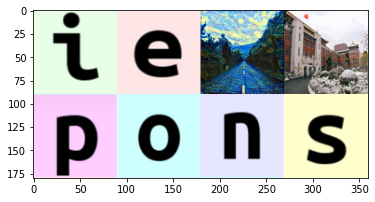

In [50]:
# 先拆分
ims_x = ims.reshape((2,-1,ims.shape[1], ims.shape[2],ims.shape[3]))  # (b,h,w,c)->(b1,b2,h,w,c)
#再transpose b2 h
ims_x = ims_x.transpose(0,2,1,3,4)# (b1,h, b2,w, c)
# 最后合并
ims_x = ims_x.reshape((ims_x.shape[0]*ims.shape[1], -1,ims_x.shape[4]))
plt.imshow(ims_x.astype(np.uint))
plt.show()

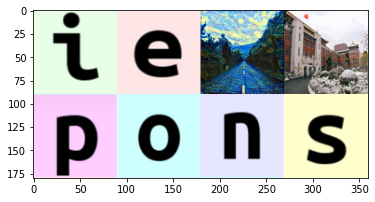

In [63]:
ims_x2 = rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c", b1=2) #将b拆成b1，b2
plt.imshow(ims_x2.astype(np.uint))

将图片拆成两列--前面一个维度拆成两个维度

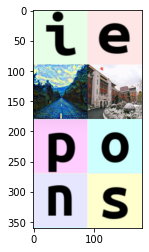

In [62]:
ims_d2 = rearrange(ims, "(b1 b2) h w c-> (b1 h) (b2 w) c", b1=4)
plt.imshow(ims_d2.astype(np.uint))

height变为2倍，width变为1半

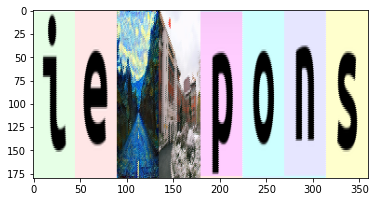

In [64]:
ims_k = rearrange(ims, "b h (w w2) c-> (h w2) (b w) c", w2=2)# 将原来的w拆成w1*2，即width减半
plt.imshow(ims_k.astype(np.uint))